In [7]:
import pandas as pd #import pandas
import matplotlib.pyplot as plt
import seaborn as sns
log_df = pd.read_csv('/home/jovyan/Linux_2k_log.csv') #read file

In [8]:
print(log_df.head()) #print the top part of the csv file

   LineId Month  Date      Time  Level       Component      PID  \
0       1   Jun    14  15:16:01  combo  sshd(pam_unix)  19939.0   
1       2   Jun    14  15:16:02  combo  sshd(pam_unix)  19937.0   
2       3   Jun    14  15:16:02  combo  sshd(pam_unix)  19937.0   
3       4   Jun    15  02:04:59  combo  sshd(pam_unix)  20882.0   
4       5   Jun    15  02:04:59  combo  sshd(pam_unix)  20884.0   

                                             Content EventId  \
0  authentication failure; logname= uid=0 euid=0 ...     E16   
1                           check pass; user unknown     E27   
2  authentication failure; logname= uid=0 euid=0 ...     E16   
3  authentication failure; logname= uid=0 euid=0 ...     E18   
4  authentication failure; logname= uid=0 euid=0 ...     E18   

                                       EventTemplate  
0  authentication failure; logname= uid=0 euid=0 ...  
1                           check pass; user unknown  
2  authentication failure; logname= uid=0 euid=

In [9]:
print(log_df.info()) # check columns and information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LineId         2000 non-null   int64  
 1   Month          2000 non-null   object 
 2   Date           2000 non-null   int64  
 3   Time           2000 non-null   object 
 4   Level          2000 non-null   object 
 5   Component      2000 non-null   object 
 6   PID            1849 non-null   float64
 7   Content        2000 non-null   object 
 8   EventId        2000 non-null   object 
 9   EventTemplate  2000 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 156.4+ KB
None


In [10]:
for column in log_df.columns:
    print(f'{column}: {log_df[column].unique()}')

LineId: [   1    2    3 ... 1998 1999 2000]
Month: ['Jun' 'Jul']
Date: [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30  1  2  3  4  5  6  7
  8  9 10 11 12 13]
Time: ['15:16:01' '15:16:02' '02:04:59' '04:06:18' '04:06:19' '04:06:20'
 '04:12:42' '04:12:43' '12:12:34' '12:13:19' '12:13:20' '14:53:32'
 '14:53:33' '14:53:34' '14:53:35' '14:53:36' '20:05:31' '04:10:22'
 '04:10:23' '04:10:24' '04:16:17' '04:16:18' '04:03:33' '04:03:34'
 '04:03:36' '04:09:43' '04:09:45' '07:07:00' '07:07:02' '07:07:04'
 '19:43:13' '20:29:26' '20:34:57' '20:55:06' '20:55:07' '01:30:59'
 '02:08:10' '02:08:11' '02:08:12' '02:23:10' '04:07:05' '04:07:06'
 '04:08:55' '04:08:57' '04:09:02' '04:09:11' '04:15:18' '03:40:59'
 '04:02:54' '04:02:55' '04:08:37' '04:08:38' '04:44:39' '09:20:05'
 '09:20:06' '09:20:07' '09:20:08' '04:06:57' '04:06:58' '04:06:59'
 '04:13:03' '04:13:04' '08:56:36' '03:17:26' '03:17:35' '03:17:36'
 '03:17:45' '03:17:46' '03:17:52' '03:17:55' '03:17:56' '03:18:02'
 '03:18:05' '03:18:06' '03

In [11]:
log_target_service = log_df['Component'].value_counts().head(10) #count the number of times each component appears in the csv
#get the top 10 most registered services
print(log_target_service)

Component
ftpd              916
sshd(pam_unix)    677
su(pam_unix)      172
kernel             76
klogind            46
logrotate          43
named              16
cups               12
udev                8
syslogd 1.4.1       7
Name: count, dtype: int64


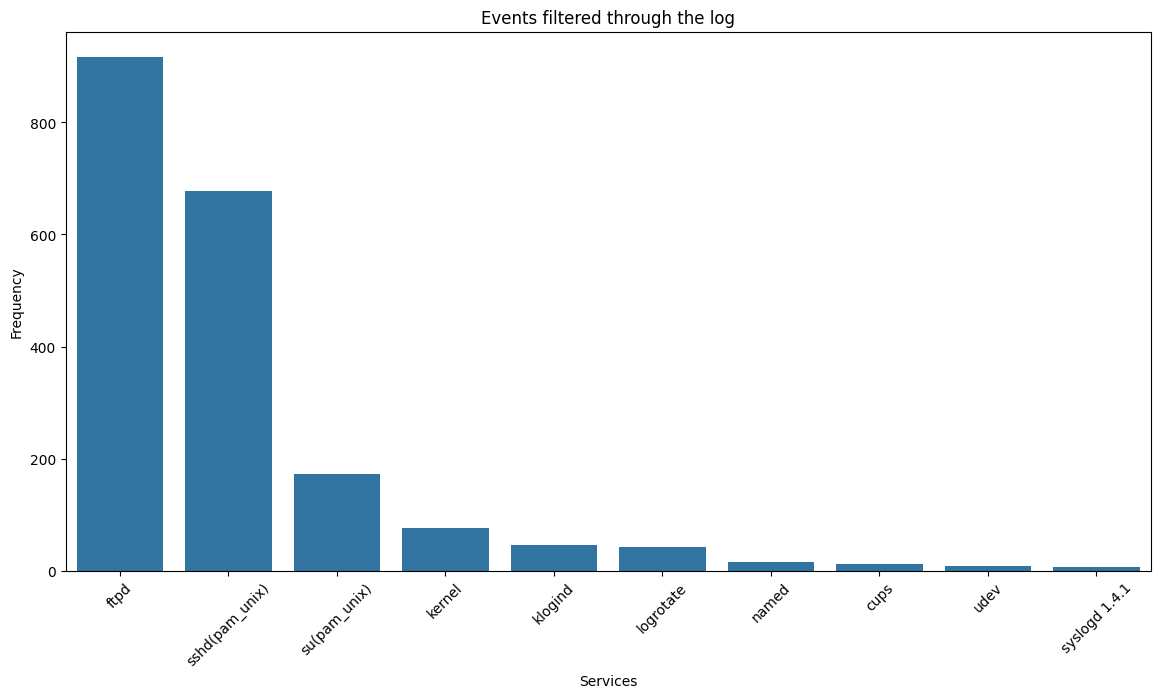

In [12]:
plt.figure(figsize=(14,7))
sns.barplot(x=log_target_service.index, y=log_target_service.values)
plt.title('Events filtered through the log')
plt.xlabel('Services')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [13]:
common_messages = log_df['Content'].value_counts()
print(common_messages)

Content
check pass; user unknown                                                                              117
authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=150.183.249.110  user=root     80
session opened for user cyrus by (uid=0)                                                               43
session closed for user cyrus                                                                          43
ALERT exited abnormally with [1]                                                                       43
                                                                                                     ... 
connection from 24.54.76.216 (24-54-76-216.bflony.adelphia.net) at Fri Jun 17 07:07:04 2005             1
connection from 24.54.76.216 (24-54-76-216.bflony.adelphia.net) at Fri Jun 17 07:07:02 2005             1
connection from 218.38.58.3 () at Wed Jul 27 10:59:53 2005                                              1
syslogd startup succeeded             